# Chennai House Price Prediction

Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.




In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
pd.set_option('display.max_rows',None,'display.max_columns',None)
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(9,4)
plt.rcParams['figure.dpi']=120
plt.rcParams['font.size']=12

In [3]:
data=pd.read_csv('train-chennai-sale.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
data.shape

(7109, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
#max selling price
print('the maximum selling price of house is Rs.{}'.format(data.SALES_PRICE.max()))
#min selling price
print('the minimum selling price of house is Rs.{}'.format(data.SALES_PRICE.min()))

the maximum selling price of house is Rs.23667340
the minimum selling price of house is Rs.2156875


In [7]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


# Data Cleaning

In [8]:
# As we dont consider the Id,Reg_fee and Comm columns we can drop them
data=data.drop(columns=['PRT_ID','REG_FEE','COMMIS'],axis=1)
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [9]:
#categorical columns
cat_columns=data.select_dtypes('object')
cat_columns.head()

,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C


In [10]:
#Numerical columns
num_columns=data.select_dtypes(exclude=['object'])
num_columns.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,21717770
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,13159200
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,9630290
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,7406250


In [11]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [12]:
#correcting the spelling mistakes
data.AREA=data.AREA.replace({'Adyr':'Adyar',
                             'Velachery':'Velacherry',
                             'Velchery':'Velacherry',
                             'Chormpet':'Chrompet',
                             'Chrmpet':'Chrompet',
                             'Chrompt':'Chrompet',
                             'TNagar':'T Nagar',
                             'KKNagar':'KK Nagar',
                             'Ann Nagar':'Anna Nagar',
                             'Ana Nagar':'Anna Nagar',
                            'Karapakkam':'Karapakam'})

In [13]:
data.AREA.value_counts()
#Chrompet has the highest houses been sold

Chrompet      1702
Karapakam     1366
KK Nagar       997
Velacherry     981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [14]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [15]:
data.SALE_COND=data.SALE_COND.replace({'AbNormal':'Abnormal',
                                     'Ab Normal':'Abnormal',
                                     'Partiall':'Partial',
                                     'PartiaLl':'Partial',
                                     'AdjLand':'Adj Land'})

In [16]:
data.SALE_COND.value_counts()
#Adj Land has been sold the most

Adj Land       1439
Partial        1433
Normal Sale    1423
Abnormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [17]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [18]:
data.PARK_FACIL=data.PARK_FACIL.replace({'Noo':'No'})

In [19]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [21]:
data.BUILDTYPE=data.BUILDTYPE.replace({'Others':'Other','Comercial':'Commercial'})

In [22]:
data.BUILDTYPE.value_counts()
#Houses are the most sold than the commercial and other pusrposes

House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [23]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [24]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.apply(lambda x: x.strip())

In [25]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa', 'All Pub'], dtype=object)

In [26]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.replace({'AllPub':'All Pub'})

In [27]:
data.UTILITY_AVAIL.value_counts()
#The houses with All pub utility are the most sold houses

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [28]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [29]:
data.STREET=data.STREET.replace({'Pavd':'Paved','NoAccess':'No Access'})

In [30]:
data.STREET.value_counts()
#The houses with Paved road facility had been sold out the most

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [31]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [32]:
data.MZZONE.value_counts()
#the houses within RL zone sold the highest whereas in Industrial ZOne less houses were sold.

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

## converting the date_time cols to date_time objects

In [33]:
data.DATE_SALE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7109 entries, 0 to 7108
Series name: DATE_SALE
Non-Null Count  Dtype 
--------------  ----- 
7109 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB


In [34]:
data.DATE_SALE=pd.to_datetime(data.DATE_SALE)
data.DATE_BUILD=pd.to_datetime(data.DATE_BUILD)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

## Check Duplicate Values

In [36]:
data.duplicated().sum()
#no duplicates were found

0

## check the missing values

In [37]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

There are missing values in N_BEDROOM,N_BATHROOM,QS_OVERALL columns.


In [38]:
data.QS_OVERALL.describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [39]:
data.QS_OVERALL.mode()

0    3.54
Name: QS_OVERALL, dtype: float64

We can clearly see that mean,median and mode are all same.hence we can fill data.QS_OVERALL null values with mean~3.5

In [40]:
data.QS_OVERALL=data.QS_OVERALL.fillna(data.QS_OVERALL.mean().round(6))

In [41]:
data.QS_OVERALL.isnull().sum()

0

In [42]:
data.N_BATHROOM.isnull().sum()

5

In [43]:
data.N_BATHROOM.describe()

count    7104.000000
mean        1.213260
std         0.409639
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [44]:
data.N_BATHROOM.mode()


0    1.0
Name: N_BATHROOM, dtype: float64

In [45]:
#Even though is looks like  numerical it is a categorical column.so,it is better fill with mode
data.N_BATHROOM=data.N_BATHROOM.fillna(data.N_BATHROOM.mode()[0])

In [46]:
data.N_BATHROOM.isnull().sum()

0

In [47]:
data.N_BEDROOM.isnull().sum()

1

In [48]:
#Even though is looks like  numerical it is a categorical column.so,it is better fill with mode
data.N_BEDROOM=data.N_BEDROOM.fillna(data.N_BEDROOM.mode()[0])

In [49]:
data.N_BEDROOM.isnull().sum()

0

In [50]:
#recheck the missing values
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [51]:
#type casting the data types attributes
data.N_BATHROOM=data.N_BATHROOM.astype('int64')
data.N_BEDROOM=data.N_BEDROOM.astype('int64')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

# Finding the age of the house

In [53]:
data['AGE']=np.abs(pd.DatetimeIndex(data.DATE_BUILD).year-pd.DatetimeIndex(data.DATE_SALE).year)
data.AGE

0       44
1       11
2       20
3       22
4       30
5        5
6       28
7       10
8       34
9       15
10      28
11      37
12      19
13      26
14      54
15       9
16      18
17      36
18      30
19      42
20       4
21      22
22      10
23      16
24       5
25      34
26      30
27       7
28      39
29      35
30       9
31      10
32      20
33      19
34       6
35      21
36      27
37      13
38      26
39      40
40      36
41      18
42      48
43      46
44      16
45      29
46      21
47      11
48      28
49       9
50      34
51      49
52       5
53       9
54      30
55      30
56      36
57      45
58       5
59      28
60      22
61      31
62      39
63      36
64      41
65      21
66      24
67      25
68       5
69      23
70      44
71       5
72      54
73      30
74      30
75      21
76       9
77      29
78      10
79      33
80      40
81      28
82      28
83       6
84      43
85      28
86       6
87      13
88      37
89      37
90      25

In [54]:
data['SALE_YEAR']=pd.DatetimeIndex(data.DATE_SALE).year
data['BUILD_YEAR']=pd.DatetimeIndex(data.DATE_BUILD).year

In [55]:
#now we can delete unnecessary coulumns
data=data.drop(columns=['DATE_SALE','DATE_BUILD'])
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,SALE_YEAR,BUILD_YEAR
0,Karapakam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,Velacherry,1855,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,Karapakam,1226,84,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,2009,1979


In [56]:
data=data.reindex(columns=[col for col in data.columns if col!='SALES_PRICE']+['SALES_PRICE'])
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,SALE_YEAR,BUILD_YEAR,SALES_PRICE
0,Karapakam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,44,2011,1967,7600000
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,11,2006,1995,21717770
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20,2012,1992,13159200
3,Velacherry,1855,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22,2010,1988,9630290
4,Karapakam,1226,84,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,30,2009,1979,7406250


## Final Data for analysis

In [57]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,SALE_YEAR,BUILD_YEAR,SALES_PRICE
0,Karapakam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,44,2011,1967,7600000
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,11,2006,1995,21717770
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20,2012,1992,13159200
3,Velacherry,1855,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22,2010,1988,9630290
4,Karapakam,1226,84,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,30,2009,1979,7406250


In [58]:
data.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,SALE_YEAR,BUILD_YEAR,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013989,-0.012610,-0.123840,-0.009301,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017255,-0.003559,0.012821,0.005706,0.018783
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014245,-0.045873,-0.185263,0.012421,0.330987
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007961,-0.020403,-0.105395,0.001514,0.108834
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015418,-0.033316,-0.109391,0.013409,0.602760
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516147,0.019718,0.003002,-0.018704,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549056,0.021700,-0.000047,-0.021168,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628168,-0.017971,0.002794,0.018011,0.018804
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.516147,0.549056,0.628168,1.000000,0.012517,0.000028,-0.012200,0.020485
AGE,-0.012610,-0.003559,-0.045873,-0.020403,-0.033316,0.019718,0.021700,-0.017971,0.012517,1.000000,-0.055050,-0.984721,-0.118842


<AxesSubplot:>

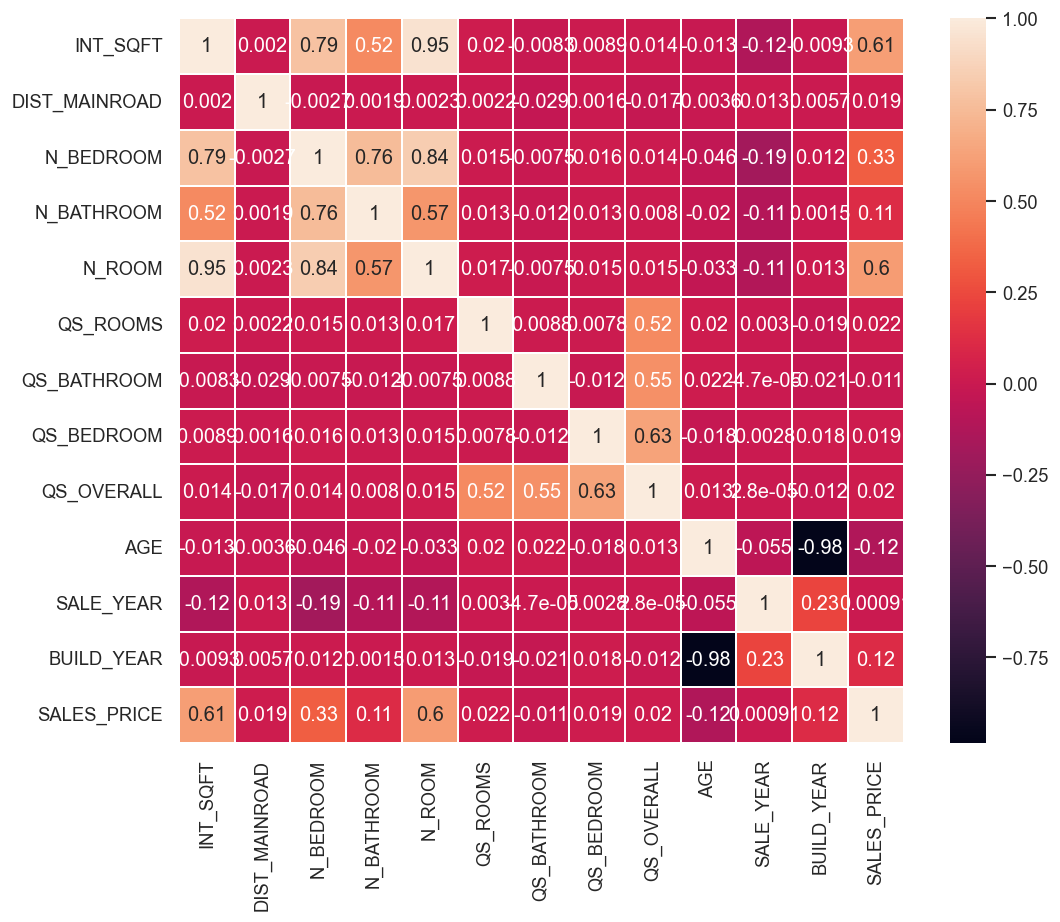

In [59]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data=data.corr(),annot=True,lw=0.2,fmt='.2g',square=True)

1.Built ueat of the houses

In [60]:
house_built=data.BUILD_YEAR.value_counts()
house_built=house_built.astype('int64')

In [61]:
print('Highest number of houses built are in year {},that is number of houses {}'.format(house_built.idxmax(),house_built.max()))
print('Lowest number of houses built are in year {},that is number of houses {}'.format(house_built.idxmin(),house_built.min()))

Highest number of houses built are in year 1985,that is number of houses 200
Lowest number of houses built are in year 1949,that is number of houses 2


<AxesSubplot:xlabel='BUILD_YEAR', ylabel='SALES_PRICE'>

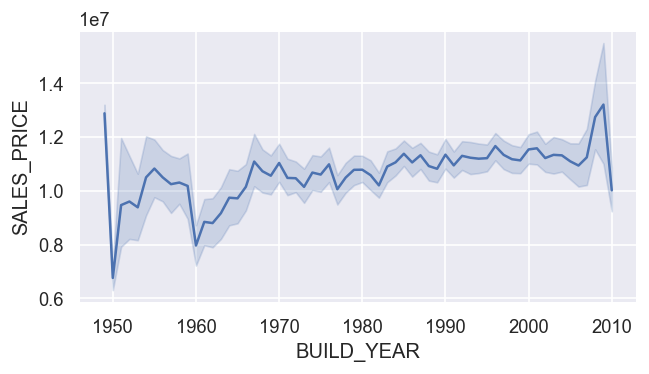

In [62]:
plt.figure(figsize=(6,3))
sns.lineplot(data=data,x='BUILD_YEAR',y='SALES_PRICE')

<AxesSubplot:xlabel='SALE_YEAR', ylabel='SALES_PRICE'>

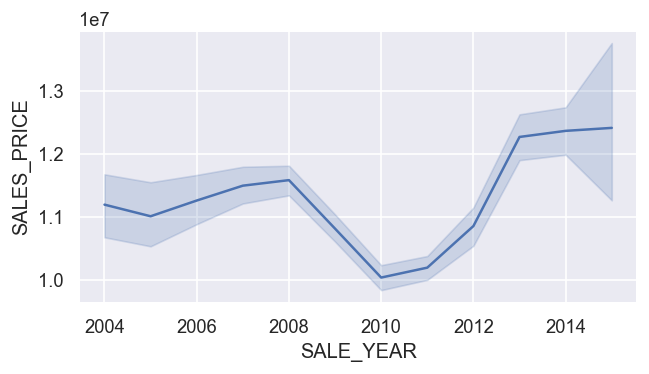

In [63]:
plt.figure(figsize=(6,3))
sns.lineplot(data=data,x='SALE_YEAR',y='SALES_PRICE')

Text(0.5, 1.0, 'Number of Houses sold per year')

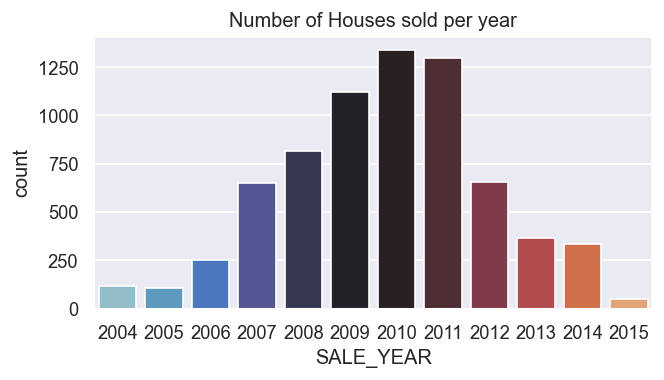

In [64]:
#number of houses sold per year
plt.figure(figsize=(6,3))
sns.countplot(data=data,x='SALE_YEAR',palette='icefire')
plt.title('Number of Houses sold per year')

# 3.AREA

In [65]:
order=data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index()
order

,AREA,SALES_PRICE
0,Karapakam,7.340100e+06
1,Adyar,9.185668e+06
2,Chrompet,1.001381e+07
3,Velacherry,1.104735e+07
4,KK Nagar,1.269623e+07
5,Anna Nagar,1.516820e+07
6,T Nagar,1.561674e+07


In [66]:
order.AREA.tolist()

['Karapakam',
 'Adyar',
 'Chrompet',
 'Velacherry',
 'KK Nagar',
 'Anna Nagar',
 'T Nagar']

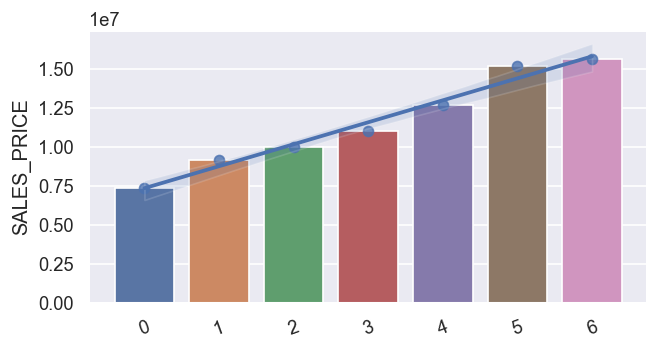

In [67]:
plt.figure(figsize=(6,3))
sns.barplot(data=order,x=order.index,y=order['SALES_PRICE'])
sns.regplot(data=order,x=list(range(order.shape[0])),y=order['SALES_PRICE'])
plt.xticks(rotation=20);

here we can see the linear relation between Area and SALES_PRICE

# 4.INT_SQFT

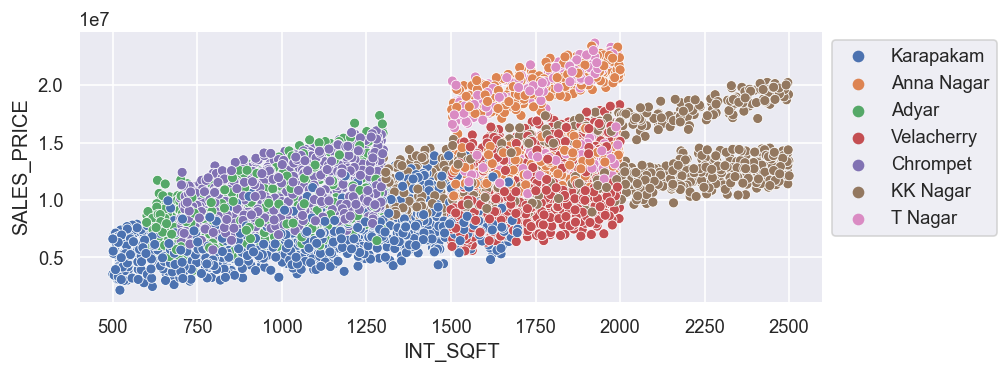

In [68]:
plt.figure(figsize=(8,3))
sns.scatterplot(data=data,x='INT_SQFT',hue='AREA',y='SALES_PRICE')
plt.legend(bbox_to_anchor=(1,1))

<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

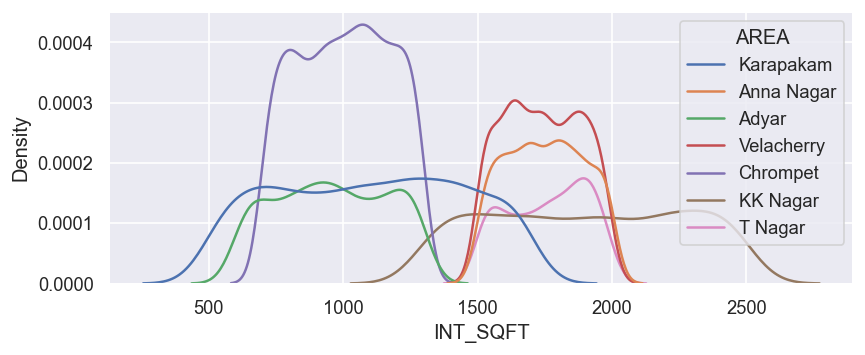

In [69]:
plt.figure(figsize=(8,3))
sns.kdeplot(data=data,x='INT_SQFT',hue='AREA')

# 5.Distance from main road

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

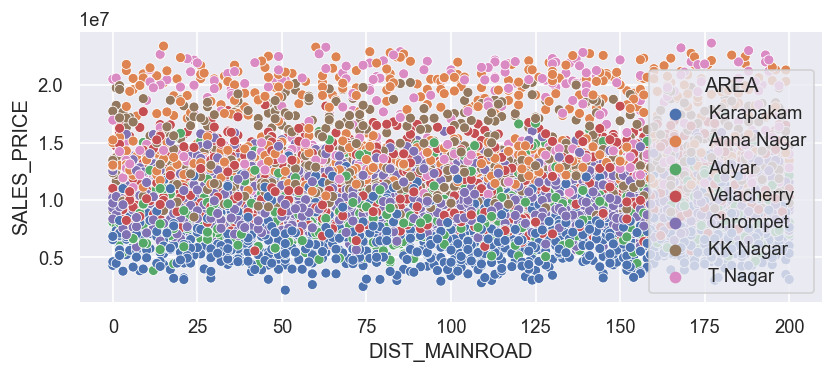

In [70]:
plt.figure(figsize=(8,3))
sns.scatterplot(data=data,x='DIST_MAINROAD',y='SALES_PRICE',hue='AREA')

<Figure size 480x360 with 0 Axes>

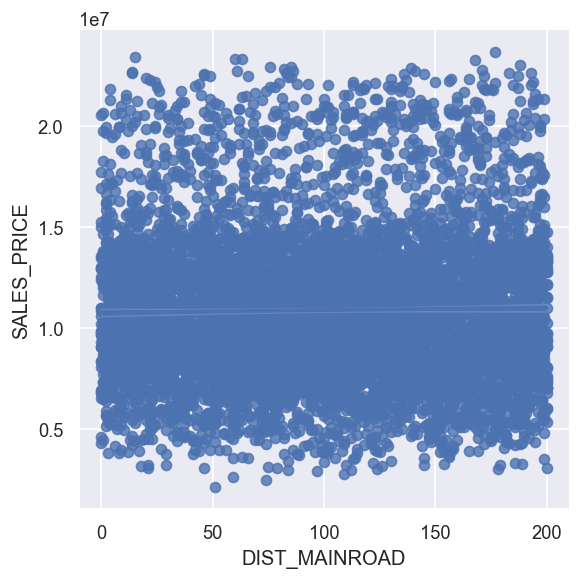

In [71]:
plt.figure(figsize=(4,3))
sns.lmplot(data=data,x='DIST_MAINROAD',y='SALES_PRICE')

Above figure concludes that it doesn't have the linear Relationship.The distance from the main road does not effect the sales price.

# 6.Rooms

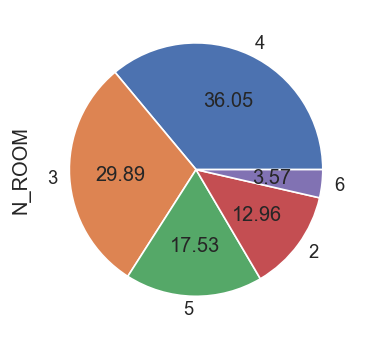

In [72]:
plt.figure(figsize=(4,3))
data.N_ROOM.value_counts().plot(kind='pie',autopct='%.2f')
plt.tight_layout()

The above pie chart iilustrates that 36%  of the houses which were sold are having 4 rooms

In [73]:
room_order=data[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE')
room_order

,SALES_PRICE
N_ROOM,
2,6.982718e+06
3,9.298812e+06
4,1.169143e+07
5,1.414533e+07
6,1.445131e+07


In [74]:
room_order.SALES_PRICE

N_ROOM
2    6.982718e+06
3    9.298812e+06
4    1.169143e+07
5    1.414533e+07
6    1.445131e+07
Name: SALES_PRICE, dtype: float64

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

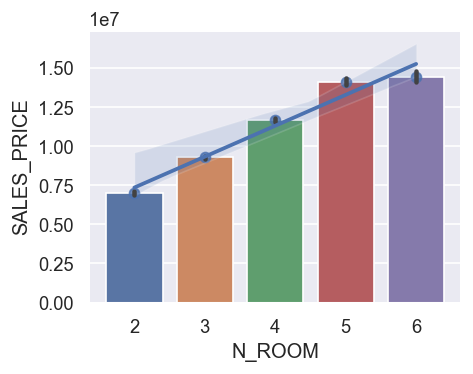

In [75]:
plt.figure(figsize=(4,3))
sns.barplot(data=data,x='N_ROOM',y='SALES_PRICE')
sns.regplot(data=room_order,x=list(range(room_order.shape[0])),y=room_order['SALES_PRICE'])

# 7.Bedrooms

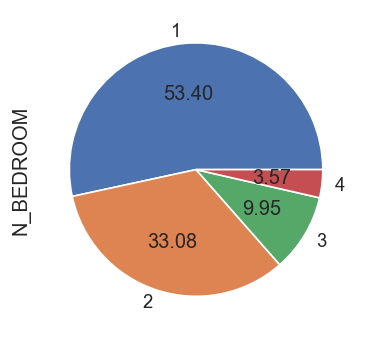

In [76]:
plt.figure(figsize=(4,3))
data.N_BEDROOM.value_counts().plot(kind='pie',autopct="%.2f")
plt.tight_layout()

In [77]:
order=data[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE')
order

,SALES_PRICE
N_BEDROOM,
1,9.790449e+06
2,1.181747e+07
3,1.247813e+07
4,1.445131e+07


<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

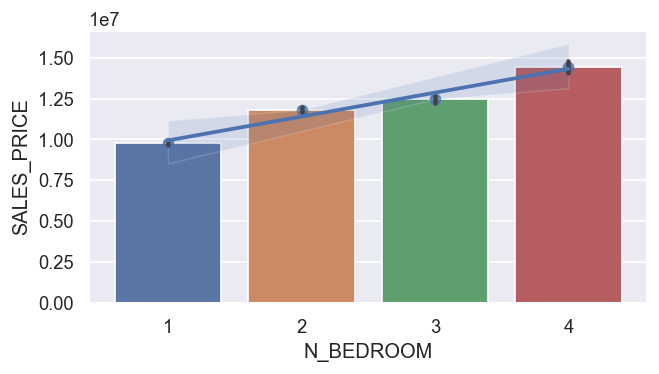

In [78]:
plt.figure(figsize=(6,3))
sns.barplot(data=data,x='N_BEDROOM',y='SALES_PRICE')
sns.regplot(data=order,x=list(range(order.shape[0])),y=order['SALES_PRICE'])

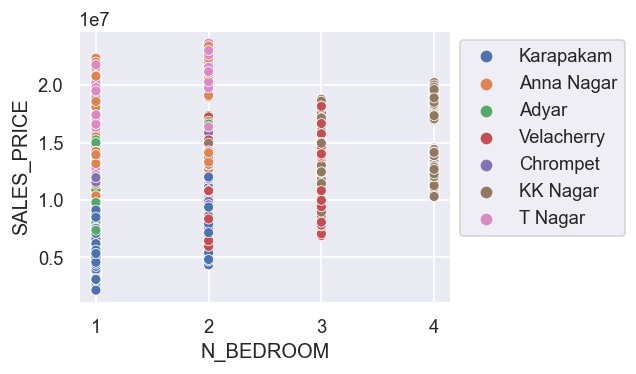

In [79]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x='N_BEDROOM',y='SALES_PRICE',hue='AREA')
plt.legend(bbox_to_anchor=(1,1))

# 8.Bathrooms

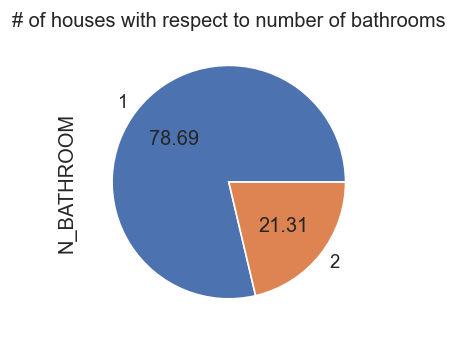

In [80]:
plt.figure(figsize=(4,3))
data.N_BATHROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("# of houses with respect to number of bathrooms")
plt.tight_layout()
#we can see that 78% of the houses having only 1 bathroom

# 9. Sale_condition

In [81]:
order=data[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALE_COND').reset_index()
order=order.sort_values('SALES_PRICE')

Text(0.5, 1.0, 'Sale condition Vs. House price')

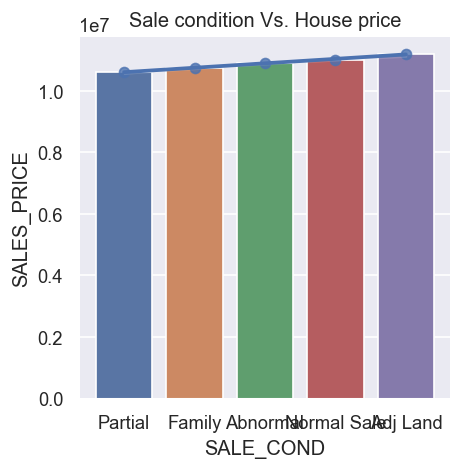

In [82]:
plt.figure(figsize=(4,4))
sns.barplot( x='SALE_COND', y='SALES_PRICE',data=order)
sns.regplot(data=order,x=list(range(order.shape[0])), y='SALES_PRICE')
plt.title("Sale condition Vs. House price")

we can see thre is a linear relationship

# 10. Parking Facility 

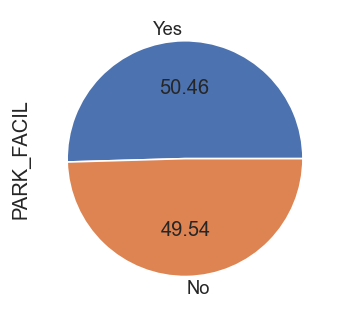

In [83]:
plt.figure(figsize=(3,3))
data.PARK_FACIL.value_counts().plot(kind='pie',autopct='%.2f')
plt.tight_layout()

In [84]:
order=data[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('PARK_FACIL').reset_index()
order

,PARK_FACIL,SALES_PRICE
0,No,1.033805e+07
1,Yes,1.144168e+07


<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

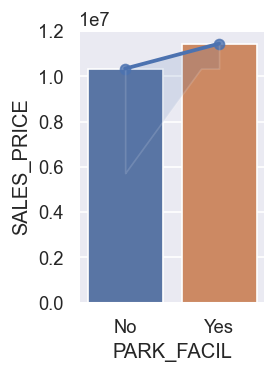

In [85]:
plt.figure(figsize=(2,3))
sns.barplot(data=order,x='PARK_FACIL',y='SALES_PRICE')
sns.regplot(data=order,x=list(range(order.shape[0])),y='SALES_PRICE')

# 11.Built_type

In [86]:
data.BUILDTYPE.value_counts()

House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [87]:
order=data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index()
order

,BUILDTYPE,SALES_PRICE
0,House,9.098847e+06
1,Other,9.807998e+06
2,Commercial,1.386984e+07


<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

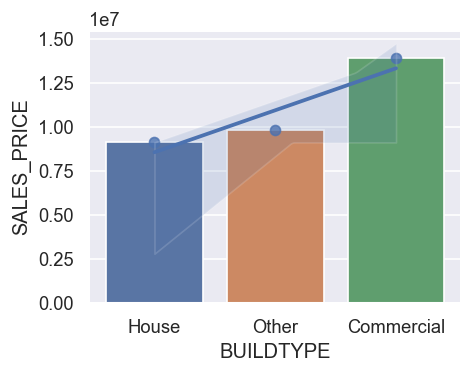

In [88]:
plt.figure(figsize=(4,3))
sns.barplot(data=order,x='BUILDTYPE',y='SALES_PRICE')
sns.regplot(data=order,x=list(range(order.shape[0])),y='SALES_PRICE')

# 12. Utility_available

In [89]:
data.UTILITY_AVAIL.value_counts()

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

<AxesSubplot:ylabel='UTILITY_AVAIL'>

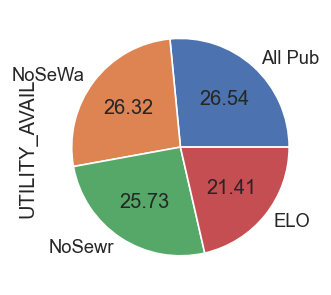

In [90]:
plt.figure(figsize=(3,3))
data.UTILITY_AVAIL.value_counts().plot(kind='pie',autopct='%.2f')


In [91]:
order=data[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').reset_index()
order

,UTILITY_AVAIL,SALES_PRICE
0,ELO,1.046941e+07
1,NoSeWa,1.089308e+07
2,NoSewr,1.092576e+07
3,All Pub,1.121002e+07


<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

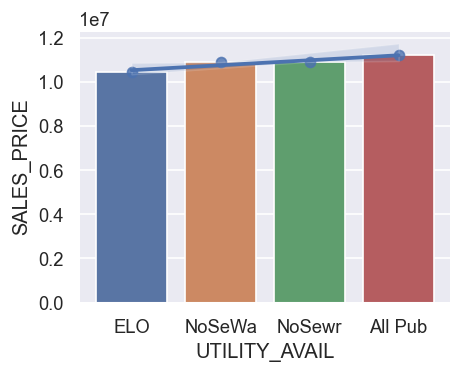

In [92]:
plt.figure(figsize=(4,3))
sns.barplot(data=order,x='UTILITY_AVAIL',y='SALES_PRICE')
sns.regplot(data=order,x=list(range(order.shape[0])),y='SALES_PRICE')

# 13. Street

In [93]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

<AxesSubplot:ylabel='STREET'>

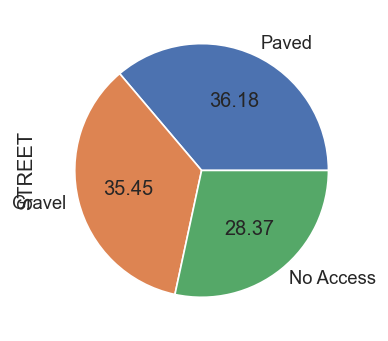

In [94]:
plt.figure(figsize=(3.5,3.5))
data.STREET.value_counts().plot(kind='pie',autopct='%.2f')

In [95]:
order=data[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').reset_index()
order

,STREET,SALES_PRICE
0,No Access,1.000074e+07
1,Paved,1.105754e+07
2,Gravel,1.144462e+07


<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

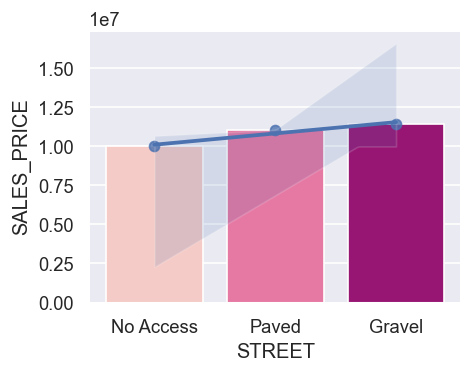

In [96]:
plt.figure(figsize=(4,3))
sns.barplot(data=order,x='STREET',y='SALES_PRICE',palette='RdPu')
sns.regplot(data=order,x=list(range(order.shape[0])),y='SALES_PRICE')

# 14. Municipality Zone

In [97]:
data.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [98]:
data.MZZONE.nunique()

6

<AxesSubplot:ylabel='MZZONE'>

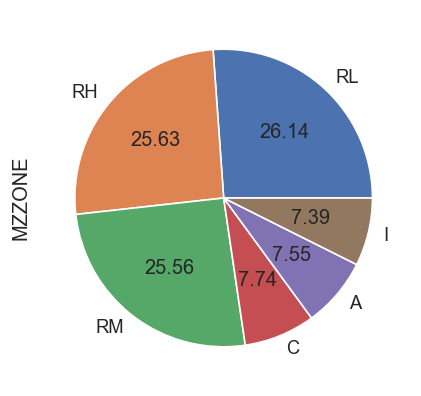

In [99]:
plt.figure(figsize=(4,6))
data.MZZONE.value_counts().plot(kind='pie',autopct='%.2f')

we can see most of the sales occures in RH MZZONE.

In [100]:
order=data[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').reset_index()
order

,MZZONE,SALES_PRICE
0,A,7.292591e+06
1,C,8.052270e+06
2,I,8.738633e+06
3,RH,1.103997e+07
4,RL,1.176576e+07
5,RM,1.240707e+07


<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

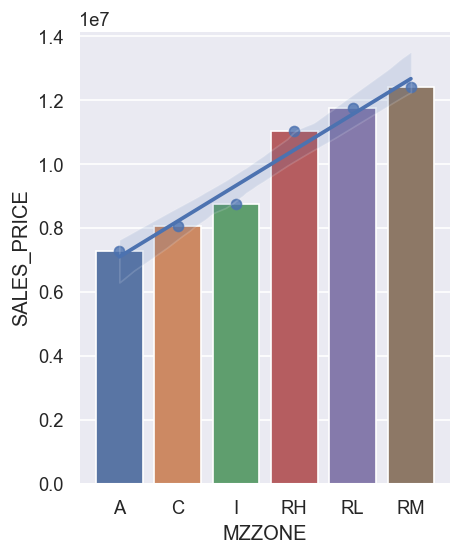

In [101]:
plt.figure(figsize=(4,5))
sns.barplot(data=order,x='MZZONE',y='SALES_PRICE')
sns.regplot(data=order,x=list(range(order.shape[0])),y='SALES_PRICE')

# 15. Age of the house

<AxesSubplot:ylabel='Density'>

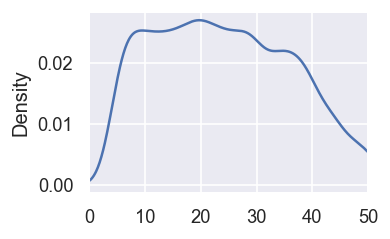

In [102]:
plt.figure(figsize=(3,2))
plt.xlim(0,50)
data.AGE.plot(kind='kde')
#we can see most of the buildings lie between 10 to 30 years

<AxesSubplot:xlabel='AGE', ylabel='Density'>

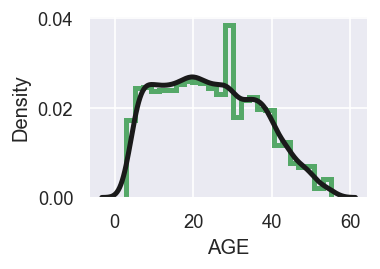

In [103]:
plt.figure(figsize=(3,2))
sns.distplot(data.AGE,kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                       hist_kws={"histtype": "step", "linewidth": 3,
                               "alpha": 1, "color": "g"})


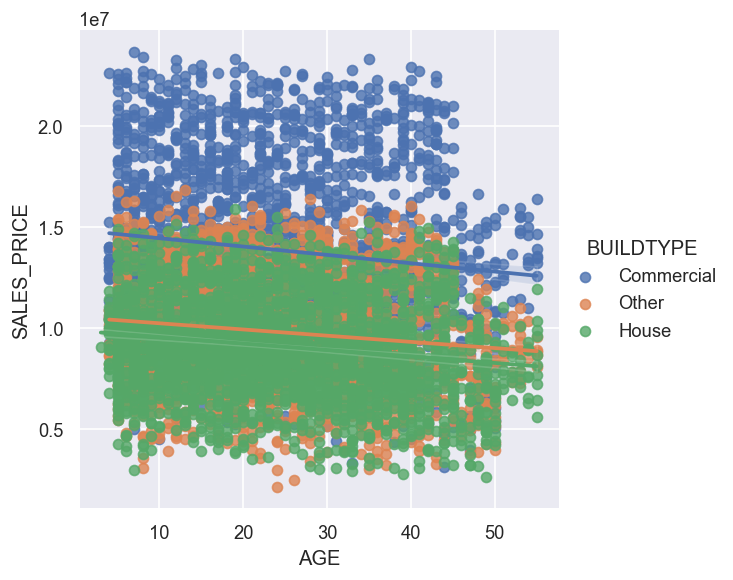

In [104]:
sns.lmplot(data=data,x='AGE',y='SALES_PRICE',hue='BUILDTYPE')

# 16. QS_Rooms

<AxesSubplot:ylabel='Density'>

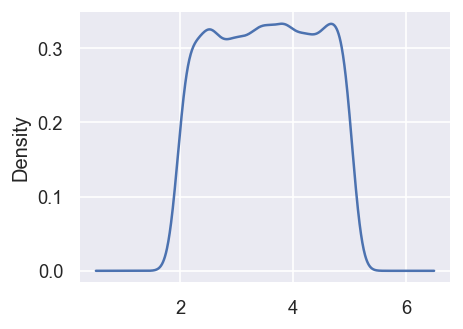

In [105]:
plt.figure(figsize=(4,3))
data.QS_ROOMS.plot(kind='kde')

<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

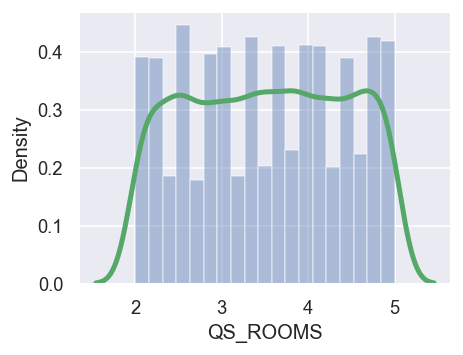

In [106]:
plt.figure(figsize=(4,3))
sns.distplot(data.QS_ROOMS,kde_kws={"color": "g", "lw": 3, "label": "KDE"})

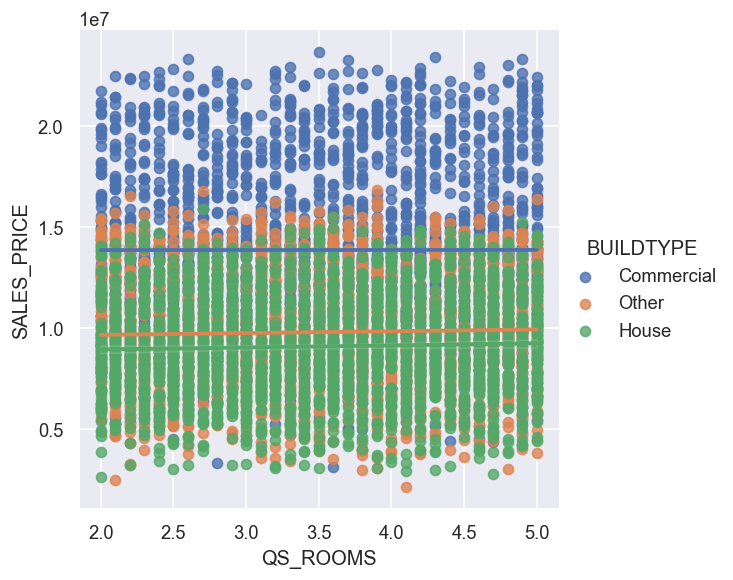

In [107]:
sns.lmplot(data=data,x='QS_ROOMS',y='SALES_PRICE',hue='BUILDTYPE')

# 17. QS OVERALL

<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

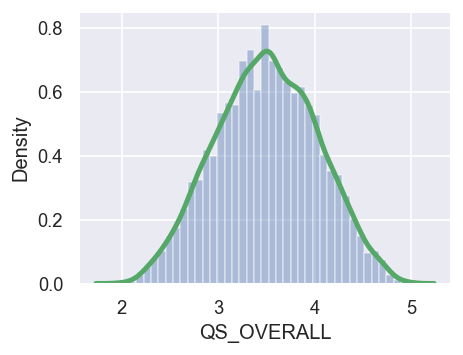

In [108]:
plt.figure(figsize=(4,3))
sns.distplot(data.QS_OVERALL,kde_kws={"color": "g", "lw": 3, "label": "KDE"})

## Data Pre-Processing

In [109]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,SALE_YEAR,BUILD_YEAR,SALES_PRICE
0,Karapakam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,44,2011,1967,7600000
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,11,2006,1995,21717770
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20,2012,1992,13159200
3,Velacherry,1855,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22,2010,1988,9630290
4,Karapakam,1226,84,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,30,2009,1979,7406250


In [110]:
df=data.copy()
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,SALE_YEAR,BUILD_YEAR,SALES_PRICE
0,Karapakam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,44,2011,1967,7600000
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,11,2006,1995,21717770
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20,2012,1992,13159200
3,Velacherry,1855,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22,2010,1988,9630290
4,Karapakam,1226,84,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,30,2009,1979,7406250


In [111]:
data.AREA.unique()

array(['Karapakam', 'Anna Nagar', 'Adyar', 'Velacherry', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [112]:
order=data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index()
order.AREA.tolist()

['Karapakam',
 'Adyar',
 'Chrompet',
 'Velacherry',
 'KK Nagar',
 'Anna Nagar',
 'T Nagar']

In [113]:
data.AREA=data.AREA.map({'Karapakam':1,'Adyar':2,'Chrompet':3,'Velacherry':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})
data.AREA

0       1
1       6
2       2
3       4
4       1
5       3
6       3
7       4
8       3
9       4
10      3
11      3
12      3
13      2
14      4
15      4
16      1
17      3
18      2
19      6
20      3
21      3
22      5
23      3
24      7
25      7
26      2
27      1
28      2
29      7
30      6
31      2
32      7
33      4
34      6
35      5
36      1
37      4
38      3
39      2
40      3
41      1
42      1
43      1
44      5
45      1
46      7
47      6
48      1
49      2
50      7
51      1
52      5
53      5
54      2
55      1
56      1
57      7
58      1
59      2
60      3
61      1
62      1
63      7
64      6
65      6
66      4
67      2
68      2
69      5
70      6
71      2
72      4
73      2
74      2
75      6
76      1
77      1
78      6
79      3
80      4
81      1
82      4
83      1
84      7
85      2
86      3
87      7
88      2
89      7
90      2
91      5
92      3
93      5
94      5
95      7
96      3
97      2
98      2
99      3


In [114]:
order=data[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index()
order.SALE_COND.tolist()

['Partial', 'Family', 'Abnormal', 'Normal Sale', 'Adj Land']

In [115]:
data.SALE_COND=data.SALE_COND.map({'Partial':1, 'Family':2, 'Abnormal':3, 'Normal Sale':4, 'Adj Land':5})


In [116]:
data.PARK_FACIL=data.PARK_FACIL.map({'Yes':1,'No':0})

In [117]:
order=data[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').reset_index()
order.UTILITY_AVAIL.tolist()

['ELO', 'NoSeWa', 'NoSewr', 'All Pub']

In [118]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'All Pub':4})

In [119]:
order=data[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').reset_index()
order.STREET.tolist()

['No Access', 'Paved', 'Gravel']

In [120]:
data.STREET=data.STREET.map({'No Access':1, 'Paved':2, 'Gravel':3})

In [121]:
order=data[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').reset_index()
order.MZZONE.tolist()

['A', 'C', 'I', 'RH', 'RL', 'RM']

In [122]:
data.MZZONE=data.MZZONE.map({'A':1, 'C':2, 'I':3, 'RH':4, 'RL':5, 'RM':6})

In [123]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,SALE_YEAR,BUILD_YEAR,SALES_PRICE
0,1,1004,131,1,1,3,3,1,Commercial,4,2,1,4.0,3.9,4.9,4.330,44,2011,1967,7600000
1,6,1986,26,2,1,5,3,0,Commercial,4,3,4,4.9,4.2,2.5,3.765,11,2006,1995,21717770
2,2,909,70,1,1,3,3,1,Commercial,1,3,5,4.1,3.8,2.2,3.090,20,2012,1992,13159200
3,4,1855,14,3,2,5,2,0,Other,3,2,3,4.7,3.9,3.6,4.010,22,2010,1988,9630290
4,1,1226,84,1,1,3,3,1,Other,4,3,2,3.0,2.5,4.1,3.290,30,2009,1979,7406250


<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

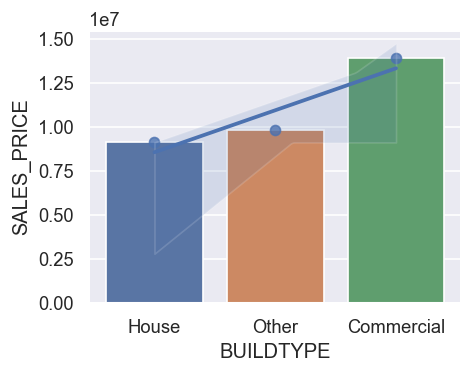

In [124]:
order=data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index()
plt.figure(figsize=(4,3))
sns.barplot(data=order,x='BUILDTYPE',y='SALES_PRICE')
sns.regplot(data=order,x=list(range(order.shape[0])),y='SALES_PRICE')

In [125]:
data=pd.get_dummies(data)

In [126]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,SALE_YEAR,BUILD_YEAR,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,131,1,1,3,3,1,4,2,1,4.0,3.9,4.9,4.330,44,2011,1967,7600000,1,0,0
1,6,1986,26,2,1,5,3,0,4,3,4,4.9,4.2,2.5,3.765,11,2006,1995,21717770,1,0,0
2,2,909,70,1,1,3,3,1,1,3,5,4.1,3.8,2.2,3.090,20,2012,1992,13159200,1,0,0
3,4,1855,14,3,2,5,2,0,3,2,3,4.7,3.9,3.6,4.010,22,2010,1988,9630290,0,0,1
4,1,1226,84,1,1,3,3,1,4,3,2,3.0,2.5,4.1,3.290,30,2009,1979,7406250,0,0,1


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   DIST_MAINROAD         7109 non-null   int64  
 3   N_BEDROOM             7109 non-null   int64  
 4   N_BATHROOM            7109 non-null   int64  
 5   N_ROOM                7109 non-null   int64  
 6   SALE_COND             7109 non-null   int64  
 7   PARK_FACIL            7109 non-null   int64  
 8   UTILITY_AVAIL         7109 non-null   int64  
 9   STREET                7109 non-null   int64  
 10  MZZONE                7109 non-null   int64  
 11  QS_ROOMS              7109 non-null   float64
 12  QS_BATHROOM           7109 non-null   float64
 13  QS_BEDROOM            7109 non-null   float64
 14  QS_OVERALL            7109 non-null   float64
 15  AGE                  

### Drop Unnecessary columns
##### . columns like QS Rooms,QS Bathrooms,QS Overall, distance from main road are not relatable to the sale price do drop them

In [128]:
data=data.drop(columns=['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','SALE_YEAR'])
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE,BUILD_YEAR,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,1,1,3,3,1,4,2,1,44,1967,7600000,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,11,1995,21717770,1,0,0
2,2,909,1,1,3,3,1,1,3,5,20,1992,13159200,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,22,1988,9630290,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,30,1979,7406250,0,0,1


In [129]:
data.to_csv('Cleared and Encoded Data.csv')

In [130]:
df=pd.read_csv('Cleared and Encoded Data.csv')
df.head()

,Unnamed: 0,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE,BUILD_YEAR,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1,1004,1,1,3,3,1,4,2,1,44,1967,7600000,1,0,0
1,1,6,1986,2,1,5,3,0,4,3,4,11,1995,21717770,1,0,0
2,2,2,909,1,1,3,3,1,1,3,5,20,1992,13159200,1,0,0
3,3,4,1855,3,2,5,2,0,3,2,3,22,1988,9630290,0,0,1
4,4,1,1226,1,1,3,3,1,4,3,2,30,1979,7406250,0,0,1


In [131]:
df=df.drop(columns='Unnamed: 0')
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE,BUILD_YEAR,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,1,1,3,3,1,4,2,1,44,1967,7600000,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,11,1995,21717770,1,0,0
2,2,909,1,1,3,3,1,1,3,5,20,1992,13159200,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,22,1988,9630290,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,30,1979,7406250,0,0,1


### Transformation of Abnormally Distributed Data
#### Non linearly distributed data like INT_SQFT doesn't follow a normal distribution data,hence need to be transformed

<AxesSubplot:ylabel='Density'>

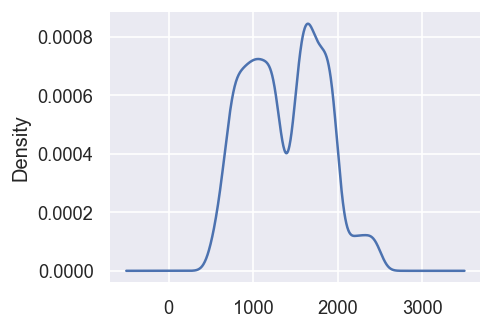

In [132]:
plt.figure(figsize=(4,3))
df.INT_SQFT.plot.kde()

In [133]:
#we prefer log here
df.INT_SQFT=np.log(df.INT_SQFT)

<AxesSubplot:ylabel='Density'>

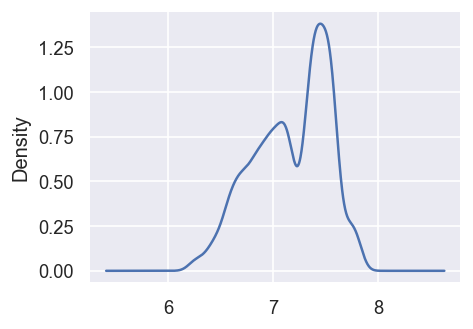

In [134]:
plt.figure(figsize=(4,3))
df.INT_SQFT.plot.kde()
#now the data looks a bit normal

## Train Test Split

In [135]:
x=df.drop(['SALES_PRICE'],axis=1)
y=df.SALES_PRICE
x.shape,y.shape

((7109, 15), (7109,))

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

## Feature Scaling
#### it is necessary to scale the data for parametric models
#### Non parametric models like Random Forest and Decision Tree can handle unscaled data

In [137]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [138]:
x_train

array([[-0.29551273, -1.00786827, -0.7982571 , ..., -0.69938064,
        -0.72320924,  1.43097715],
       [-0.29551273, -0.99250716, -0.7982571 , ...,  1.42983655,
        -0.72320924, -0.69882318],
       [ 0.79400488,  1.6899444 ,  2.92279873, ...,  1.42983655,
        -0.72320924, -0.69882318],
       ...,
       [-0.29551273, -0.15655917,  0.44209485, ..., -0.69938064,
        -0.72320924,  1.43097715],
       [-0.84027154, -0.81159376, -0.7982571 , ..., -0.69938064,
         1.3827257 , -0.69882318],
       [ 1.33876368,  0.40559334, -0.7982571 , ..., -0.69938064,
         1.3827257 , -0.69882318]])

In [139]:
x_test 

array([[ 1.33876368,  0.9047294 , -0.7982571 , ..., -0.69938064,
        -0.72320924,  1.43097715],
       [ 0.79400488,  1.4979604 ,  2.92279873, ..., -0.69938064,
         1.3827257 , -0.69882318],
       [-0.29551273, -1.13389188, -0.7982571 , ..., -0.69938064,
         1.3827257 , -0.69882318],
       ...,
       [-1.38503035,  0.01956516, -0.7982571 , ..., -0.69938064,
        -0.72320924,  1.43097715],
       [ 1.33876368,  1.09699407,  0.44209485, ..., -0.69938064,
        -0.72320924,  1.43097715],
       [-0.29551273, -0.46114317, -0.7982571 , ..., -0.69938064,
        -0.72320924,  1.43097715]])

### Problem type: Supervised Learning
For better prediction of sales price of new houses,we will try models like Linear regression,KNN,Decision Tree and Random Forest models

#### Linear Regression Model

In [140]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [141]:
y_pred

array([12970517.64298778, 12839198.164811  ,  9027303.76128807, ...,
        5864159.4178232 , 13774417.49650873,  8072430.24679437])

In [142]:
#score
from sklearn import metrics
lr_score=metrics.r2_score(y_test,y_pred)
lr_mae=metrics.mean_absolute_error(y_test,y_pred)
lr_mse=metrics.mean_squared_error(y_test,y_pred)
print('training score is {:.2f}'.format(lr.score(x_train,y_train)))
print('testing score is {:.2f}'.format(lr.score(x_test,y_test)))
print("")
print('R2 Score is {:.2f}'.format(lr_score))
print('MSE: {:.2f}'.format(lr_mse))
print('MAE: {:.2f}'.format(lr_mae))

training score is 0.92
testing score is 0.93

R2 Score is 0.93
MSE: 1122762078845.82
MAE: 790430.95


In [143]:
pre=pd.DataFrame({'Actual':y_test,'Pred':y_pred.flatten()})
pre.head()

,Actual,Pred
3093,13179060,1.297052e+07
3659,12196780,1.283920e+07
5956,8634900,9.027304e+06
2017,19844870,1.721482e+07
4325,12364620,1.263430e+07


<AxesSubplot:ylabel='Density'>

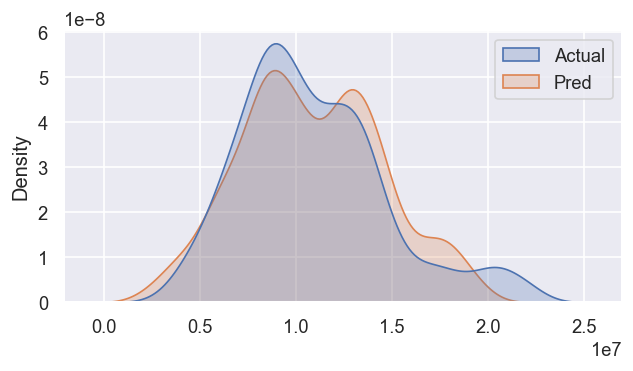

In [144]:
plt.figure(figsize=(6,3))
sns.kdeplot(data=pre,shade=True)

Model has 92% r2 score which is good model.However ther are some fluctuations

# KNN Regressor

In [145]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor().fit(x_train,y_train)
knn_pred=knn_regressor.predict(x_test)
print('KNN Regressor Training Score {:.2f}'.format(knn_regressor.score(x_train,y_train)))
print('KNN Regressor Testing Score {:.2f}'.format(knn_regressor.score(x_test,y_test)))

KNN Regressor Training Score 0.97
KNN Regressor Testing Score 0.95


### Cross Validation of KNN 

In [148]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))

K value  :  1  score :  0.9199911866582905
K value  :  2  score :  0.9373004818358529
K value  :  3  score :  0.9421771485120651
K value  :  4  score :  0.9431132201068563
K value  :  5  score :  0.9425392250634339
K value  :  6  score :  0.9429237417049936
K value  :  7  score :  0.9421469213645685
K value  :  8  score :  0.9407325660444604
K value  :  9  score :  0.9398845883093138
K value  :  10  score :  0.9388979303050886
K value  :  20  score :  0.92530062478688
K value  :  50  score :  0.9013726085566878


In [149]:
knn_regressor = KNeighborsRegressor(n_neighbors=4).fit(x_train, y_train)
knn_ypred = knn_regressor.predict(x_test)
knn_score = metrics.r2_score(y_test, knn_ypred)
knn_mae = metrics.mean_absolute_error(y_test, knn_ypred)
print("KNN regressor train score: {:.2f}".format(knn_regressor.score(x_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(x_test, y_test)))
print("KNN r2 score: {:.2f}".format(knn_score))
print("K value by cross validation  :",5, " score : ", np.mean(cross_val_score(KNeighborsRegressor(5), x_train, y_train, cv=10)))

KNN regressor train score: 0.97
KNN regressor test score: 0.95
KNN r2 score: 0.95
K value by cross validation  : 5  score :  0.9425392250634339


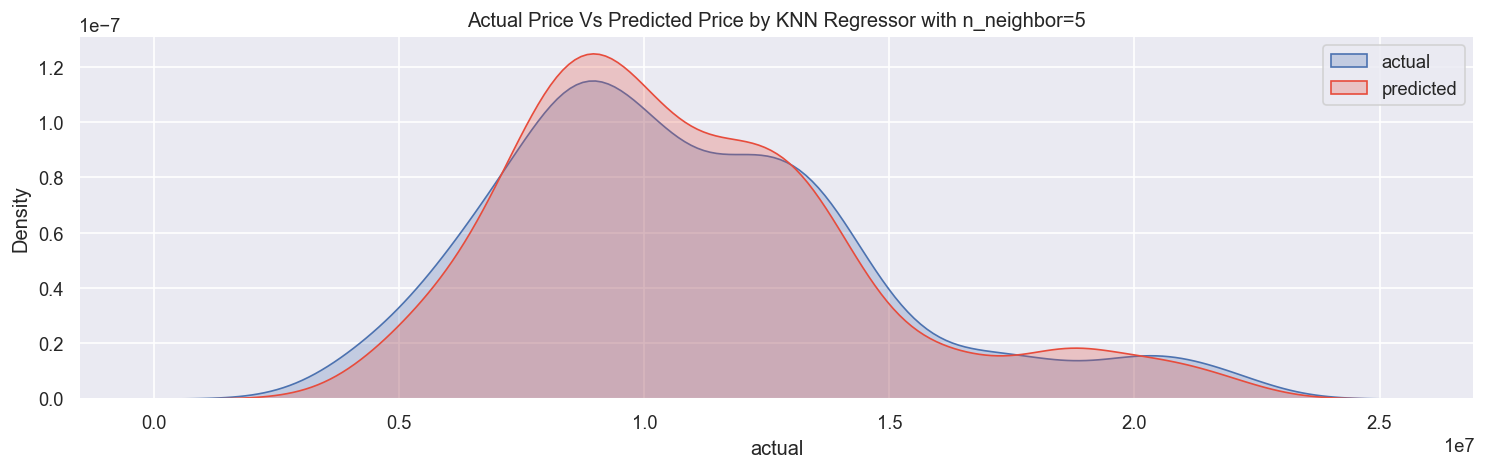

In [150]:
knn_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': knn_ypred.flatten()
})

plt.figure(figsize=(15,4))
sns.kdeplot(data=knn_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=knn_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by KNN Regressor with n_neighbor=5")
plt.legend()
plt.show()

By KNN model we the evaluation score of 95%  by r2 as evaluate metric which is very good model  at k=5 by Cross validation 

## Decision Tree Regression

In [151]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor=DecisionTreeRegressor(max_depth=8).fit(x_train,y_train)
y_pred=dt_regressor.predict(x_test)

In [152]:
#score
print('Training data Score: {:.2f}'.format(dt_regressor.score(x_train,y_train)))
print('Testing data score: {:.2f}'.format(dt_regressor.score(x_test,y_test)))
dt_score=metrics.r2_score(y_test,y_pred)
dt_mae=metrics.mean_absolute_error(y_test,y_pred)
print('')
print('DT r2 score {:.2f}'.format(metrics.r2_score(y_test,y_pred)))
print('DT MSE {:.2f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('DT MAE {:.2f}'.format(metrics.mean_absolute_error(y_test,y_pred)))

Training data Score: 0.97
Testing data score: 0.96

DT r2 score 0.96
DT MSE 540268882044.27
DT MAE 584824.84


The r^2 score looks very good and scores of the Testing and training data is also very near

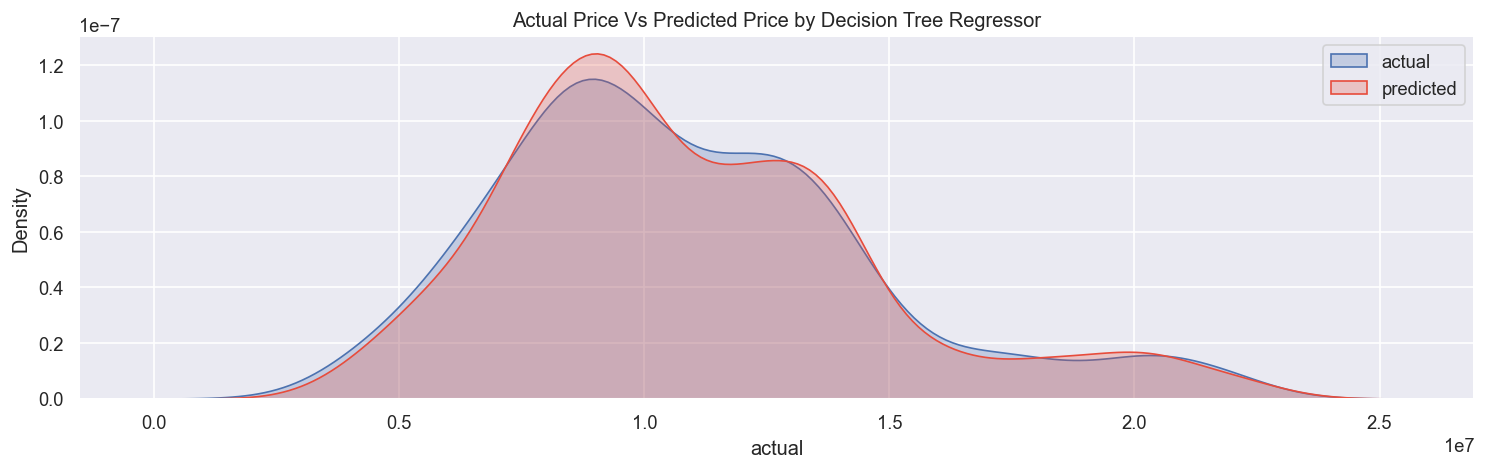

In [153]:
dt_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': y_pred.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=dt_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=dt_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by Decision Tree Regressor")
plt.legend()
plt.show()

In [154]:
dt_coefficient = pd.Series(dt_regressor.feature_importances_,index=x.columns.tolist())
dt_coefficient

AREA                    0.488226
INT_SQFT                0.097775
N_BEDROOM               0.000021
N_BATHROOM              0.012325
N_ROOM                  0.000000
SALE_COND               0.000161
PARK_FACIL              0.015360
UTILITY_AVAIL           0.000081
STREET                  0.008540
MZZONE                  0.036566
AGE                     0.000935
BUILD_YEAR              0.000445
BUILDTYPE_Commercial    0.336258
BUILDTYPE_House         0.002551
BUILDTYPE_Other         0.000757
dtype: float64

In [155]:
dt_coefficient.sort_values(ascending=False)

AREA                    0.488226
BUILDTYPE_Commercial    0.336258
INT_SQFT                0.097775
MZZONE                  0.036566
PARK_FACIL              0.015360
N_BATHROOM              0.012325
STREET                  0.008540
BUILDTYPE_House         0.002551
AGE                     0.000935
BUILDTYPE_Other         0.000757
BUILD_YEAR              0.000445
SALE_COND               0.000161
UTILITY_AVAIL           0.000081
N_BEDROOM               0.000021
N_ROOM                  0.000000
dtype: float64

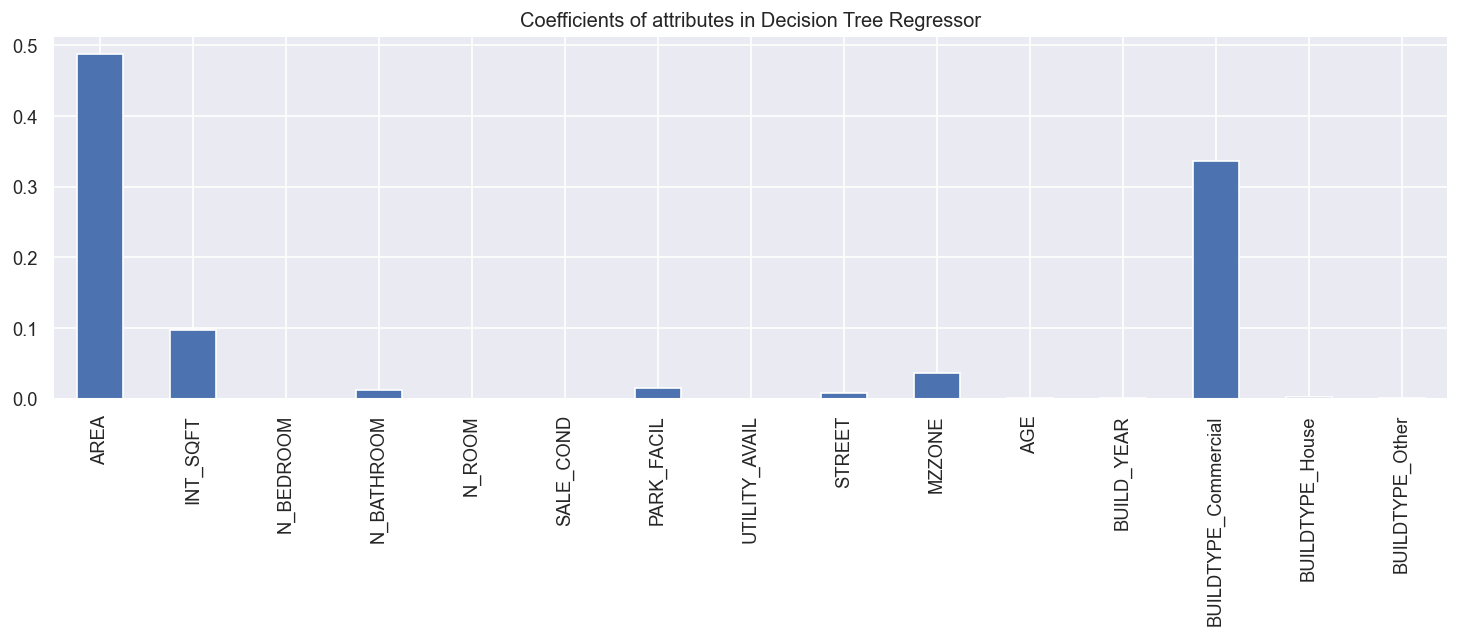

In [156]:
plt.figure(figsize=(15, 4))
dt_coefficient.plot(kind='bar')
plt.title("Coefficients of attributes in Decision Tree Regressor")
plt.show()

In the decision tree regressor model, locality, building type has more feature importance, followed by house size and municipality zone.

# Random Forest

In [181]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor().fit(x_train,y_train)
y_pred=rf_regressor.predict(x_test)
print('RF Training Score {:.2f}'.format(rf_regressor.score(x_train,y_train)))
print('RF testing Score {:.2f}'.format(rf_regressor.score(x_test,y_test)))
print(" ")
rf_score=metrics.r2_score(y_test,y_pred)
rf_mae=metrics.mean_absolute_error(y_test,y_pred)
print('RF r2 score {:.2f}'.format(metrics.r2_score(y_test,y_pred)))
print('RF MSE {:.2f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('RF MAE {:.2f}'.format(metrics.mean_absolute_error(y_test,y_pred)))

RF Training Score 1.00
RF testing Score 0.99
 
RF r2 score 0.99
RF MSE 151547450645.39
RF MAE 307458.59


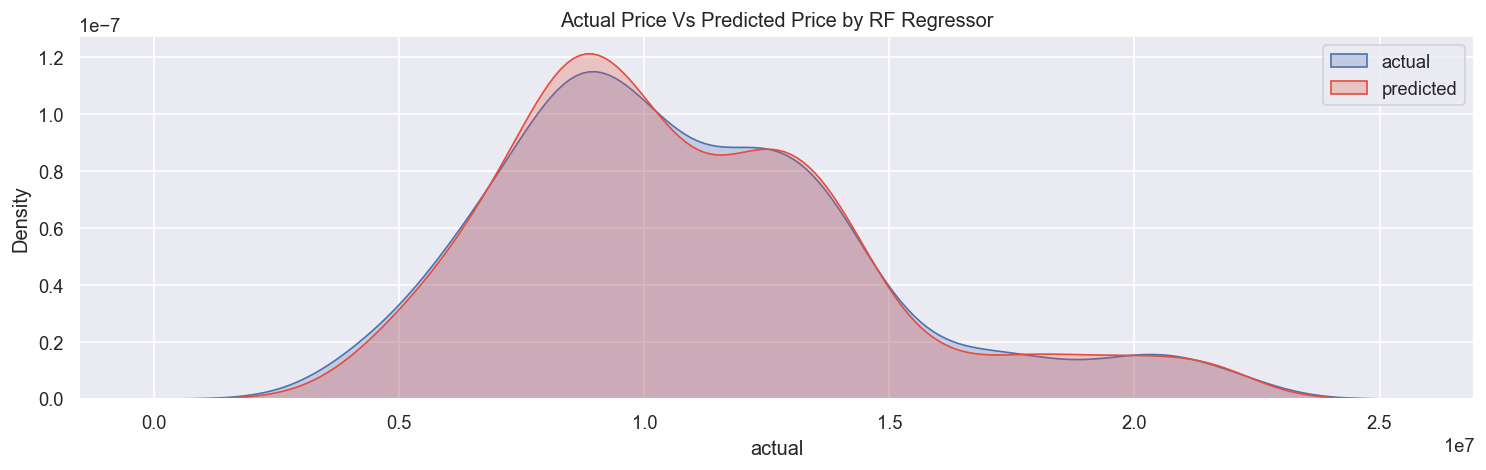

In [159]:
rf_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': y_pred.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by RF Regressor")
plt.legend()
plt.show()

It seems like a perfect model and some price are predicted higher than the actual.

### Cross Validation of RF Regressor

In [161]:
from sklearn.model_selection import GridSearchCV
rf_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'max_depth': range(5,7),'n_estimators': ( 1500, 2000),'random_state': [3]},
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0,
    n_jobs=-1
)

grid_result = rf_search.fit(x,y)

In [162]:
print("Best estimator for RF: {}".format(grid_result.best_estimator_))

Best estimator for RF: RandomForestRegressor(max_depth=6, n_estimators=2000, random_state=3)


In [182]:
rf_regressor = RandomForestRegressor(max_depth=9, n_estimators=2000, random_state=0)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
rf_score = metrics.r2_score(y_test, y_pred)
rf_mae = metrics.mean_absolute_error(y_test, y_pred)
print("RF Training score: {:.2f}".format(rf_regressor.score(x_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(x_test, y_test)))
print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

RF Training score: 0.99
RF Test score: 0.98

RF R2 score: 0.98
RF MSE: 250566720812.21
RF MAE: 400706.66


In [164]:
rf_coefficient = pd.Series(rf_regressor.feature_importances_, index=x.columns.tolist())
rf_coefficient.sort_values(ascending=False)

AREA                    0.481436
BUILDTYPE_Commercial    0.331849
INT_SQFT                0.108451
MZZONE                  0.037086
PARK_FACIL              0.014706
STREET                  0.009297
N_ROOM                  0.003587
N_BATHROOM              0.002462
N_BEDROOM               0.002244
BUILDTYPE_House         0.002045
BUILDTYPE_Other         0.002004
AGE                     0.001578
BUILD_YEAR              0.001517
SALE_COND               0.001246
UTILITY_AVAIL           0.000491
dtype: float64

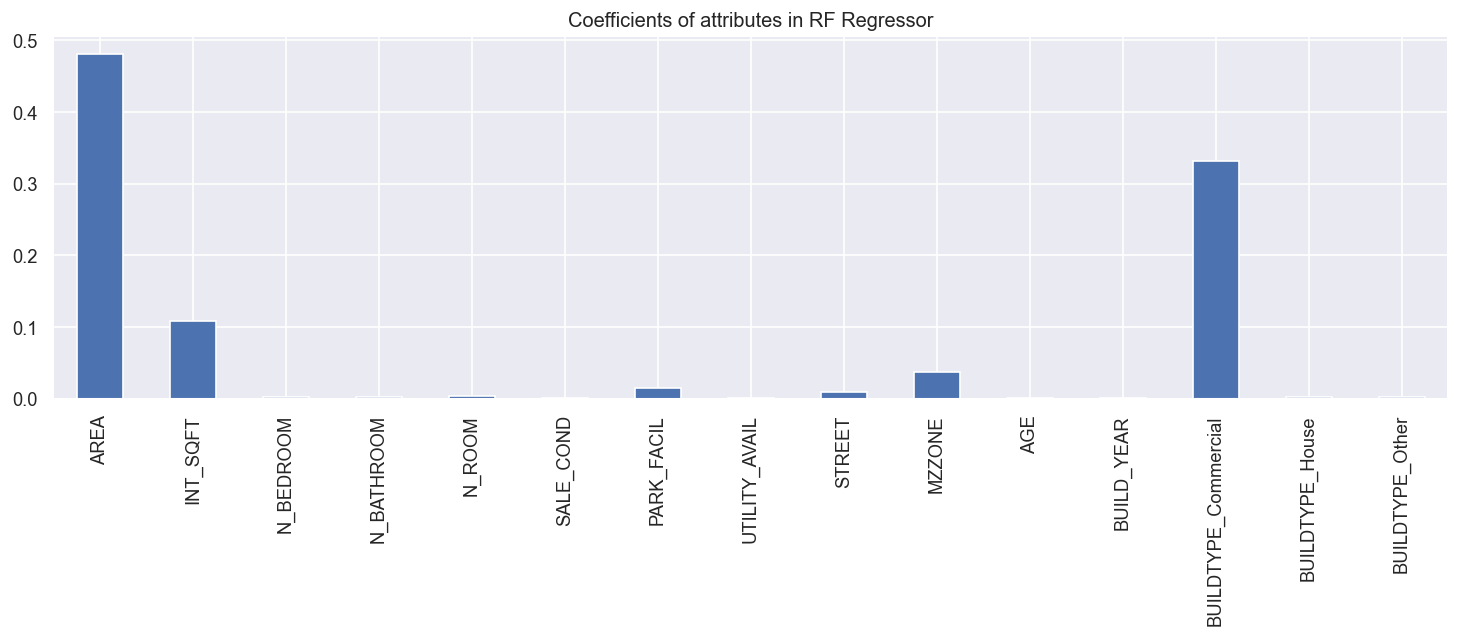

In [165]:
plt.figure(figsize=(15, 4))
rf_coefficient.plot(kind='bar')
plt.title("Coefficients of attributes in RF Regressor")
plt.show()

## XG BOOST

In [177]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.14,0.15,0.16,0.17,0.19,0.2,]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.11  Train score :  0.9989549555777081  Cross-Val score :  0.996735012935323
Learning rate :  0.12  Train score :  0.9990222370587433  Cross-Val score :  0.9967511547503376
Learning rate :  0.13  Train score :  0.9990351356922812  Cross-Val score :  0.9967613697565942
Learning rate :  0.14  Train score :  0.9991077252829131  Cross-Val score :  0.9968532045107302
Learning rate :  0.15  Train score :  0.9992117971322075  Cross-Val score :  0.9968781341742716
Learning rate :  0.16  Train score :  0.9991901914445193  Cross-Val score :  0.9969257082539171
Learning rate :  0.17  Train score :  0.9992018868688958  Cross-Val score :  0.9968177344581417
Learning rate :  0.19  Train score :  0.9992025897248359  Cross-Val score :  0.996862907839402
Learning rate :  0.2  Train score :  0.999267340427948  Cross-Val score :  0.9968150966756193
Learning rate :  0.5  Train score :  0.9993519673502241  Cross-Val score :  0.9935323233661316
Learning rate :  0.7  Train score :  0.999512

In [183]:
model = xgb.XGBRegressor(learning_rate = 0.16, n_estimators=2000)
model.fit(x_train,y_train) 
model.score(x_test, y_test)
xg_boost_score=metrics.r2_score(y_test, y_pred)
xg_boost_mae=metrics.mean_absolute_error(y_test,y_pred)
xg_boost_score,xg_boost_mae

(0.9832630318015426, 400706.6636467439)

(0.9832630318015426, 400706.6636467439)

In [184]:
models_df = pd.DataFrame({
    'model': "Linear KNN DecisionTree RandomForerst XgBoost".split(),
    'r2_score': [lr_score, knn_score, dt_score, rf_score,xg_boost_score],
    'mae': [lr_mae, knn_mae, dt_mae, rf_mae,xg_boost_mae]
})

models_df

,model,r2_score,mae
0,Linear,0.925003,790430.950170
1,KNN,0.947324,672219.382911
2,DecisionTree,0.963912,584824.839852
3,RandomForerst,0.983263,400706.663647
4,XgBoost,0.983263,400706.663647


In [171]:
models_df.max()

model            XgBoost
r2_score        0.983263
mae         790430.95017
dtype: object

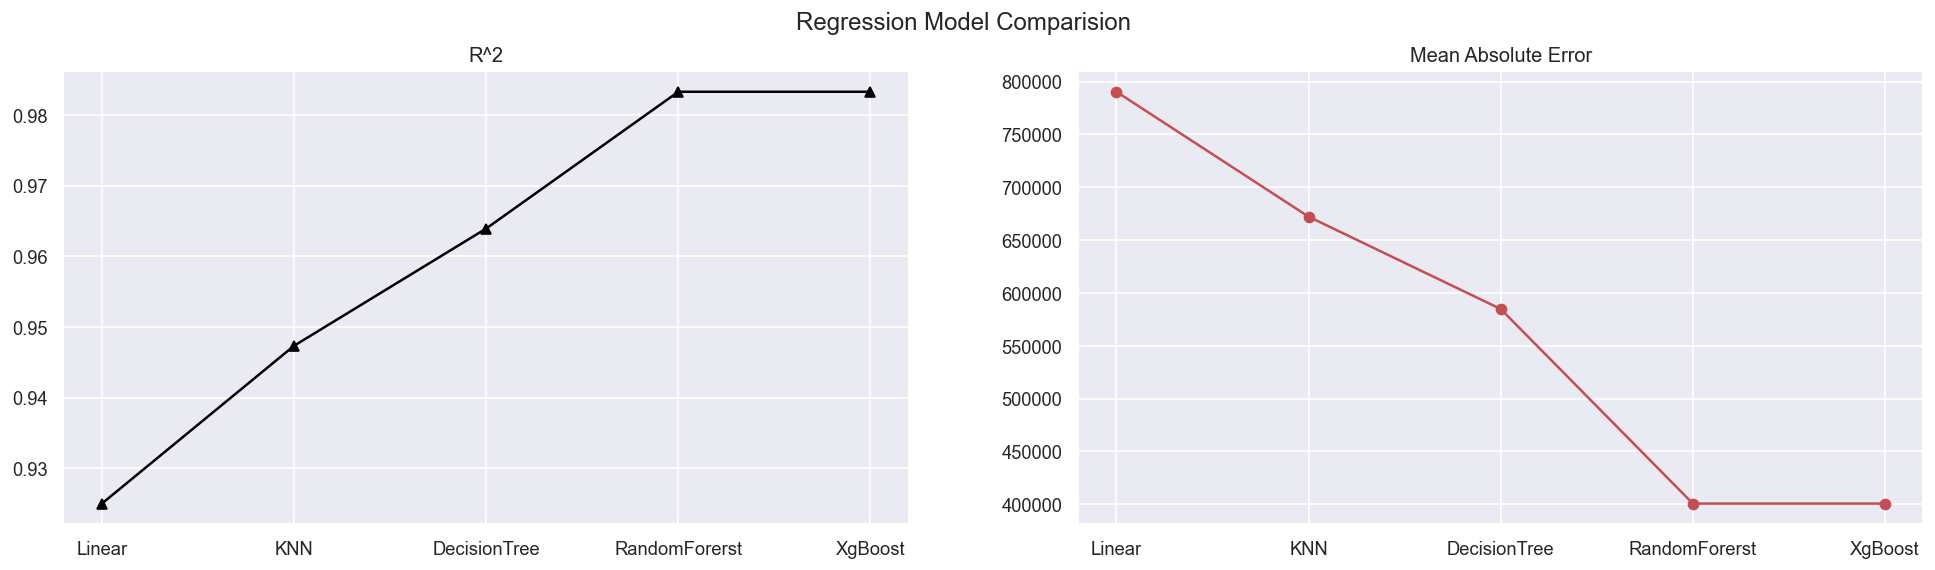

In [172]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Regression Model Comparision")
ax[0].plot(models_df.model, models_df.r2_score, color='black', marker='^')
ax[0].set_title("R^2")
ax[1].plot(models_df.model, models_df.mae, color='r', marker='o')
ax[1].set_title("Mean Absolute Error")
plt.show()

## Conclusion:
1. We can see that Random Forest and Xgboost are the best models that could fit the priction of sales price.
2. Highest house were in 2010-11 which are ranges in INR 20Laks to more than 2 crore.
3. The very important feature in sales price are house size and number of rooms.
4. More number of houses were sold in Chrompet and karapakam. These houses are actually having single bedroom and of lower price when compare with T nagar and Anna Nagar.
5. We see that the building type and utilities are key features for the price of building.
6. Building wit commercial tag and with utilities are very expensive.